In [17]:
from pymatgen import Structure
from pymatgen.symmetry.analyzer import SpacegroupAnalyzer
from pymatgen.symmetry.analyzer import SpacegroupOperations
from pymatgen.analysis.diffraction.xrd import XRDCalculator
from pymatgen.core.operations import SymmOp
from pymatgen.electronic_structure.plotter import BSPlotter
from pymatgen.electronic_structure.bandstructure import *
from pymatgen.ext.matproj import MPRester
from jupyter_jsmol.pymatgen import quick_view
from pymatgen.electronic_structure.plotter import*
import matplotlib.pyplot as plt
import numpy as np
from pymatgen.electronic_structure import plotter

In [18]:
with MPRester("AzOW60LLLKSgtVAVUq4") as m:
    structure = m.get_structure_by_material_id("mp-961678")
    band = m.get_bandstructure_by_material_id("mp-961678")


# 0. Graphique à analyser

<module 'matplotlib.pyplot' from '/usr/local/lib64/python3.6/site-packages/matplotlib/pyplot.py'>

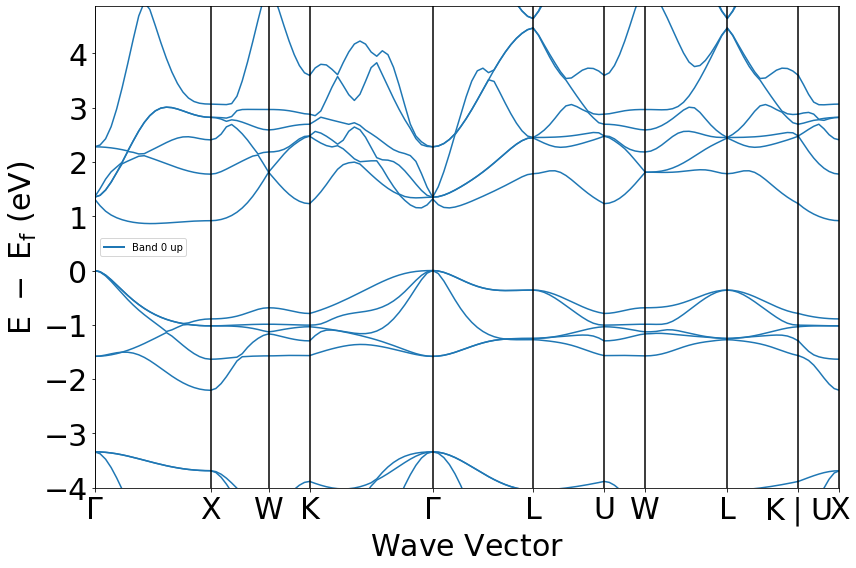

In [19]:
plot = BSPlotter(band)
plot.get_plot()

# 1. Détermination de la bande inderdite


Bande interdite directe ? False , la bande interdite est donc indirecte.
La largeur de la bande est interdite vaut  0.8646000000000003 eV.
La transition dans la bande interdite est : \Gamma-(0.238,0.000,0.238) .
Numéros des dernières bande de valence :  defaultdict(<class 'list'>, {<Spin.up: 1>: [10, 11, 12]})
Numéro de la première bande de conduction :  defaultdict(<class 'list'>, {<Spin.up: 1>: [13]})


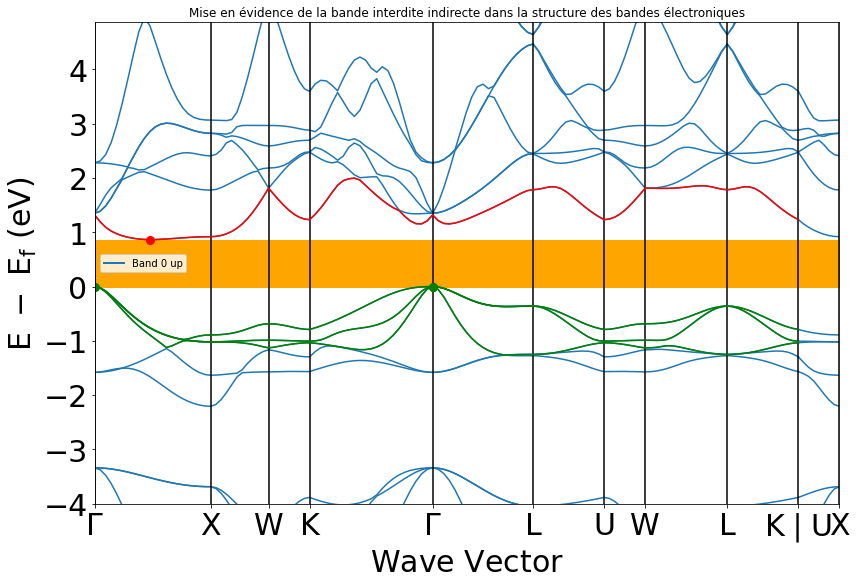

In [20]:
bs_plot_data = plotter.BSPlotter(band).bs_plot_data()
distance = bs_plot_data.get('ticks').get('distance')
distances = bs_plot_data.get('distances')
energy = bs_plot_data.get('energy')
plotter.BSPlotter(band).get_plot()

for i in range(9):
    plt.plot(distances[i],energy.get('1')[i][10],'green')
    plt.plot(distances[i],energy.get('1')[i][11],'green')
    plt.plot(distances[i],energy.get('1')[i][12],'green')
    plt.plot(distances[i],energy.get('1')[i][13],'red')
    
# On marque la CBM sur le graphe
cbm_coord = bs_plot_data.get('cbm')
for i in range(len(cbm_coord)):
    (x,y) = cbm_coord[i]
    plt.plot(x, y, 'or', markersize = 8)

# On marque les VBM sur le graphe  
vbm_coord = bs_plot_data.get('vbm')
for i in range(len(vbm_coord)):
    (x,y) = vbm_coord[i]
    plt.plot(x, y, 'og', markersize = 8)

plt.title('Mise en évidence de la bande interdite indirecte dans la structure des bandes électroniques')
plt.fill_between(np.linspace(distance[0], distance[-1], 500), 0, band.get_band_gap().get('energy'), color = "orange")

print("Bande interdite directe ? " + str(band.get_band_gap().get('direct')),", la bande interdite est donc indirecte.")
print("La largeur de la bande est interdite vaut ",band.get_band_gap()['energy'], "eV.")
print("La transition dans la bande interdite est : " + str(band.get_band_gap().get('transition')),".")

print('Numéros des dernières bande de valence : ',band.get_vbm()['band_index'])
print('Numéro de la première bande de conduction : ',band.get_cbm()['band_index'])

Les points verts représentent les points auxquels l'énergie maximale des bandes de valence est atteinte. Les points rouges représentent les points auxquels l'énergie minimale des bandes de conduction est atteinte.

La bande interdite (plage orange) est l'intervalle entre la première bande de conduction (bande rouge n°13) et la dernière bande de valence (bandes vertes n°10,11,12). Cette bande représente l'énergie minimale nécessaire pour qu'un électron quitte la bande de valence (la bande d'énergie la plus élevée occupée par les électrons) et atteigne la bande de conduction (la bande d'énergie vide ou partiellement remplie d'électrons). Si la bande interdite est faible, les électrons peuvent facilement passer de la bande de valence à la bande de conduction, ce qui rend le matériau conducteur. Ici, la valeur de cette bande vaut 0.8646000000000003 eV, ce qui est inférieur à l'unité et fait du matériau un conducteur. 

De plus, remarquons que la bande est indirecte, càd que les électrons ne peuvent pas facilement passer de la bande de valence à la bande de conduction sans interagir avec un autre électron car les extremums ne sont pas alignés verticalement. Cela signifie que la quantité d'énergie nécessaire pour qu'un électron passe de la bande de valence à la bande de conduction est plus importante. De plus, la recombinaison électron-trou ne se fait pas directement, elle passe par un état intermédiaire. Cette émission indirecte est moins intense et donc plus difficile à observer.


Pour finir, la transition càd la direction de propagation du vecteur d'onde dans la bande interdite se fait suivant une direction Gamma-(0.238,0.000,0.238) càd du point vert (central) au point rouge.




# 2. Dispersion dans les bandes de conduction/valence

La dispersion est un phénomène qui décrit la relation entre l'énergie des électrons et leur vitesse/leur direction de déplacement dans un milieu dispersif. Les électrons ayant des fréquences d'onde différentes ne se propagent pas à la même vitesse dans le milieu, ce qui dépend de la variation d'énergie du vecteur d'onde. Pour chaque bande, on recherche la direction où la dispersion atteint un maximum et un minimum. La pente la moins élevée correspond à un minimum de dispersion et vice-versa.

In [21]:
#écriture d'une fonction utile pour la suite
def pente(a,b) : 
    pente = abs(b[-1]-b[0])/(a[-1]-a[0])
    return np.array([pente,a[0],b[0],a[-1]-a[0],b[-1]-b[0]])

## 2.1 Bande de conduction

La direction dans laquelle la première bande de conduction possède le plus/le moins de dispersion est celle avec la pente la plus/la moins forte.

In [22]:
d = len(distances)
pentes_c = np.zeros((d, 5))

indice_max_c = 0
indice_min_c = 0
pente_min_c = 0
pente_max_c = 0
for i in range(d) : 
    pentes_c[i] = pente(distances[i],energy["1"][i][13]) 
    if i == 0: 
        pente_min_c = pente(distances[i],energy["1"][i][13])[0] 
        pente_max_c = pente(distances[i],energy["1"][i][13])[0] 
    else :
        if (pente_min_c > pentes_c[i][0]) :
            pente_min_c = pentes_c[i][0] 
            indice_min_c = i
        if pente_max_c < pentes_c[i][0]  :
            pente_max_c = pentes_c[i][0] 
            indice_max_c = i
pentes_c = pentes_c.T


## 2.2 Bande de valence

La direction dans laquelle la dernière bande de valence possède le plus/le moins de dispersion est celle avec la pente la plus/la moins forte.

In [23]:
pentes_v = np.zeros((d, 5))

indice_max_v = 0
indice_min_v = 0
pente_min_v = 0
pente_max_v = 0

#On calcule les pentes extrêmes et leur indice
for i in range(d) : 
    pentes_v[i] = pente(distances[i],energy["1"][i][12]) 
    if i == 0: 
        pente_min_val = pente(distances[i],energy["1"][i][12])[0] 
        pente_max_val = pente(distances[i],energy["1"][i][12])[0] 
    else :
        if (pente_min_v > pentes_v[i][0]) :
            pente_min_v = pentes_v[i][0] 
            indice_min_v = i
        if pente_max_v < pentes_v[i][0]  :
            pente_max_v = pentes_v[i][0] 
            indice_max_v = i
            
pentes_v = pentes_v.T

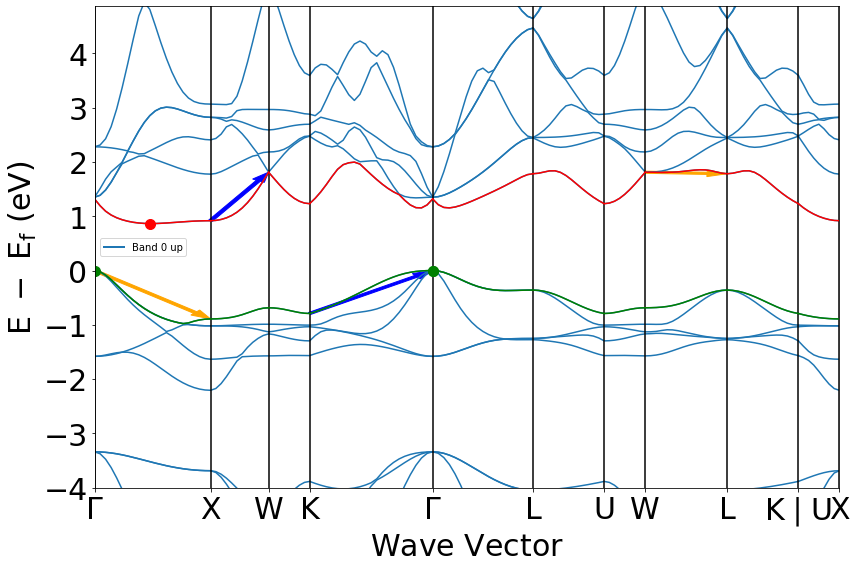

In [24]:
plotter.BSPlotter(band).get_plot()

for i in range(d):
    plt.plot(distances[i],energy['1'][i][12],'green')
    plt.plot(distances[i],energy['1'][i][13],'red')
    
#
for i in range(len(bs_plot_data.get("vbm"))):
    x, y= bs_plot_data.get("vbm")[i]
    plt.plot(x, y, 'og', markersize=10)
    
for i in range(len(bs_plot_data.get("cbm"))):
    x, y = bs_plot_data.get("cbm")[i]
    plt.plot(x ,y ,'or',markersize=10)

plt.arrow(pentes_c[1][indice_max_c], pentes_c[2][indice_max_c], pentes_c[3][indice_max_c], pentes_c[4][indice_max_c], color='blue', width=0.04, length_includes_head=True)
plt.arrow(pentes_c[1][indice_min_c], pentes_c[2][indice_min_c], pentes_c[3][indice_min_c], pentes_c[4][indice_min_c], color='orange', width=0.04, length_includes_head=True)

plt.arrow(pentes_v[1][indice_max_v], pentes_v[2][indice_max_v], pentes_v[3][indice_max_v], pentes_v[4][indice_max_v], color='blue', width=0.04, length_includes_head=True)
plt.arrow(pentes_v[1][indice_min_v], pentes_v[2][indice_min_v], pentes_v[3][indice_min_v], pentes_v[4][indice_min_v], color='orange', width=0.04, length_includes_head=True)

plt.show()

Les flèches représentent respectivement les directions pour lesquelles il y a le plus (en bleu) et le moins (en orange) de dispersion pour la dernière bande de valence et première bande de conduction, la première bande de conduction étant la bande rouge et la dernière bande de valence étant la bande vert.

Les valeurs (en valeur absolue) obtenues pour les dispersions sont :

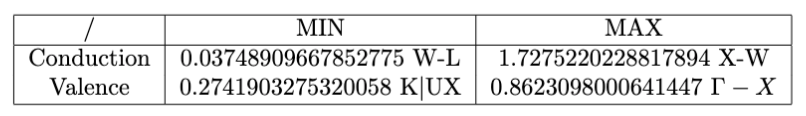

# 3. Calcul de la masse effective


La masse effective permet de considérer les électrons comme étant libres mais ayant une valeur de masse différente. Cette valeur s'obtient par la formule :

$$ m^* = \frac{\bar{h}^2}{\frac{\partial^2 \epsilon}{\partial k^2}} $$

avec \bar{h} la constante de Planck réduite, \epsilon la fonction décrivant l'énergie de la bande électronique étudiée en fonction du vecteur d'onde k.

Ici, nous nous intéressons à la valeur de la masse effective au sommet de la dernière bande de valence ainsi qu'au bas de la première bande de conduction. Pour simplifier ce calcul, il nous est demandé de considérer une dispersion parabolique. Ainsi, nous utiliserons une approximation nous permettant de décrire notre bande électronique comme ayant une énergie d'équation parabolique.

Grâce à cette hypothèse de dispersion parabolique, la masse effective peut se calculer conne suit :

$$ m^* = \frac{\bar{h}^2 \cdot k^2}{2 \cdot E(k)} $$

In [25]:
#Constantes h barre en [eV]
h_b = 6.582119570e-16 

energies_V = band.get_vbm()['energy']
kpoint_V = band.get_vbm()['kpoint'].cart_coords
energies_C = band.get_cbm()['energy']
kpoint_C = band.get_cbm()['kpoint'].cart_coords

me_V = (h_b**2 * (kpoint_V[0]**2+kpoint_V[1]**2+kpoint_V[2]**2))/(2*abs(energies_V))
me_C = (h_b**2 * (kpoint_C[0]**2+kpoint_C[1]**2+kpoint_C[2]**2))/(2*abs(energies_C))

print("En supposant l'hypothèse de dispersion parabolique, la valeur de la masse effective au sommet de la dernière bande de valence est de " + 
      str(me_V)+ "[kg] alors que celle à la base de la première bande de conduction vaut " + str(me_C) + "[kg].")

En supposant l'hypothèse de dispersion parabolique, la valeur de la masse effective au sommet de la dernière bande de valence est de 0.0[kg] alors que celle à la base de la première bande de conduction vaut 6.467051290812614e-33[kg].
